In [ ]:
!wget www.cs.umn.edu/~sjguy/data/WhiteWine.txt

URL transformed to HTTPS due to an HSTS policy
--2023-03-20 23:38:48--  https://www.cs.umn.edu/~sjguy/data/WhiteWine.txt
Resolving www.cs.umn.edu (www.cs.umn.edu)... 104.18.20.107, 104.18.21.107, 2606:4700::6812:156b, ...
Connecting to www.cs.umn.edu (www.cs.umn.edu)|104.18.20.107|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://www-users.cs.umn.edu/~sjguy/data/WhiteWine.txt [following]
--2023-03-20 23:38:49--  http://www-users.cs.umn.edu/~sjguy/data/WhiteWine.txt
Resolving www-users.cs.umn.edu (www-users.cs.umn.edu)... 134.84.66.195
Connecting to www-users.cs.umn.edu (www-users.cs.umn.edu)|134.84.66.195|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www-users.cse.umn.edu/~sjguy/data/WhiteWine.txt [following]
--2023-03-20 23:38:49--  https://www-users.cse.umn.edu/~sjguy/data/WhiteWine.txt
Resolving www-users.cse.umn.edu (www-users.cse.umn.edu)... 134.84.66.195
Connecting to www-users.cse

This Notebook delves into the fascinating world of data analysis using PyTorch. In this notebook, I embark on an exploration of logistic regression, employing three distinct models: linear, non-linear, and multilinear. 
By applying the powerful gradient descent algorithm, I aim to gain deeper insights into the white wine dataset and perform a K-Folds cross validation to get the best threshold accuracy amongst the 3 models. 

In [ ]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [ ]:
data_pd = pd.read_csv("WhiteWine.txt")

<Axes: xlabel='quality', ylabel='Count'>

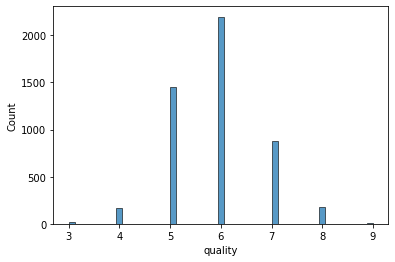

In [ ]:
sns.histplot(data_pd["quality"])

<ipython-input-8-154cae9a550a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_pd["alcohol"], kde=True)


<Axes: xlabel='alcohol', ylabel='Density'>

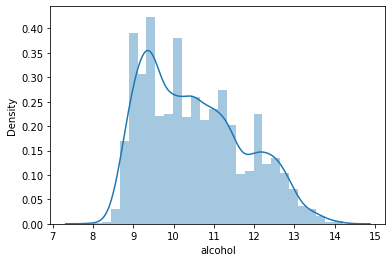

In [ ]:
sns.distplot(data_pd["alcohol"], kde=True)

<ipython-input-9-8f508205db65>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_pd["density"], kde=True)


<Axes: xlabel='density', ylabel='Density'>

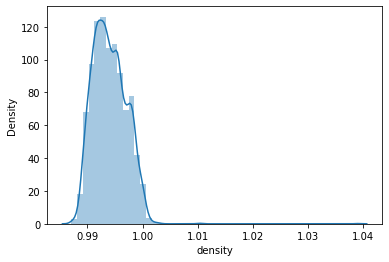

In [ ]:
sns.distplot(data_pd["density"], kde=True)

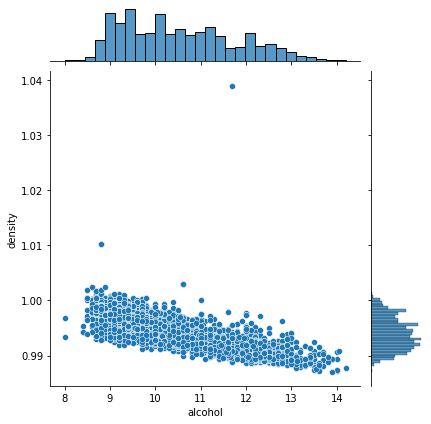

In [ ]:
sns.jointplot(data=data_pd, x="alcohol", y="density")

1D

In [ ]:
joint = pd.DataFrame.corr(data_pd)

<Axes: >

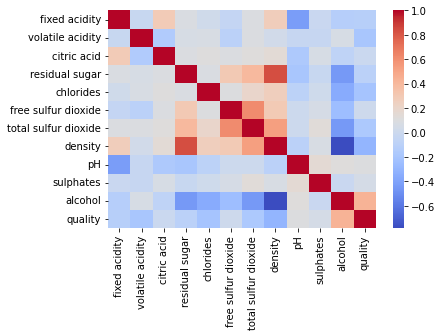

In [ ]:
sns.heatmap(joint, cmap='coolwarm')

In [ ]:
y_pt = torch.tensor(data_pd["pH"].values)/4
x_pt = torch.tensor(data_pd["quality"].values)/9

<Axes: >

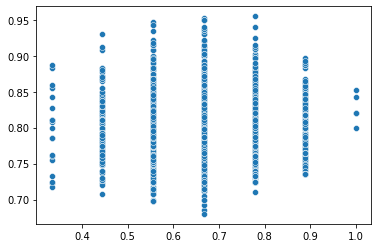

In [ ]:
sns.scatterplot(x=x_pt,y=y_pt)

In [ ]:
lr = 0.01 #Larger lr goes faster, but what about too large an lr?

m = torch.Tensor([0.1]).float()
m.requires_grad = True
b = torch.Tensor([0.1]).float()
b.requires_grad = True

for epoch in range(2000):
  y_pred = m*x_pt+b
  loss_tenor = (y_pred - y_pt)**2
  loss = loss_tenor.mean()
  loss.backward()
  with torch.no_grad():
    m -= m.grad*lr
    b -= b.grad*lr
    m.grad.zero_()
    b.grad.zero_()
  if epoch%200==0:
    print("m=",m.item(),"b=",b.item(),"loss=",loss.item())

m= 0.1082400381565094 b= 0.11263513565063477 loss= 0.400564081832298
m= 0.37959080934524536 b= 0.5457797646522522 loss= 0.0025513332091744254
m= 0.37129029631614685 b= 0.5530872941017151 loss= 0.0024877235990141506
m= 0.36238783597946167 b= 0.5589467287063599 loss= 0.0024309168557423836
m= 0.3537210524082184 b= 0.5646455883979797 loss= 0.0023771061416897514
m= 0.34528598189353943 b= 0.5701920390129089 loss= 0.002326135000575691
m= 0.3370762765407562 b= 0.5755904316902161 loss= 0.0022778504874149904
m= 0.3290860950946808 b= 0.5808443427085876 loss= 0.0022321145176781806
m= 0.32130950689315796 b= 0.5859578847885132 loss= 0.002188790372131092
m= 0.3137407600879669 b= 0.5909347534179688 loss= 0.0021477510383907487


In [ ]:
((y_pred - y_pt)**2).mean()

tensor(0.0021, dtype=torch.float64, grad_fn=<MeanBackward0>)

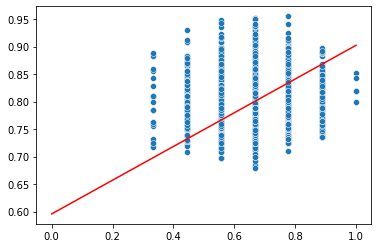

In [ ]:
sns.scatterplot(x=x_pt,y=y_pt)
y_intercept =  b.detach().numpy()
slope =  m.detach().numpy()
plt.plot([0,1],[y_intercept,slope+y_intercept], color="red")

<Axes: >

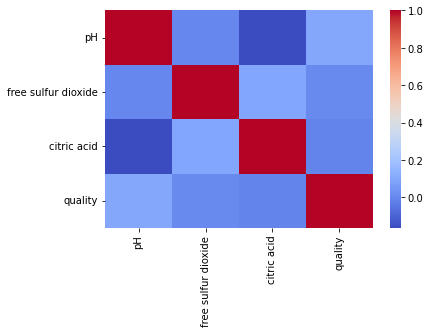

In [ ]:
corr = data_pd[['pH', 'free sulfur dioxide', 'citric acid','quality']].corr()
sns.heatmap(corr, cmap='coolwarm')

In [ ]:
features = ["pH", "free sulfur dioxide", "alcohol"]
x_lin = torch.Tensor(data_pd["alcohol"].values)
x = torch.Tensor(data_pd[features].values)
y = torch.Tensor(data_pd["quality"].values)

In [ ]:
x_mean = x.mean(dim=0)
x_mean

tensor([ 3.1883, 35.3081, 10.5143])

In [ ]:
x_norm = (x-x_mean)/x_mean
y_mean = y.mean(dim=0)
y_norm = (y-y_mean)/y_mean

In [ ]:
def gradDec(model, n_params, x, y, lr=0.01, n_epochs=2000, print_rate=200):

  params = 0.1*torch.rand(n_params).float() #Random inital paramaters
  params.requires_grad = True

  for epoch in range(n_epochs):
    y_predict = model(params, x)
    loss_tenor = (y_predict - y)**2
    loss = loss_tenor.mean()
    loss.backward()
    with torch.no_grad():
      params -= lr*params.grad
      params.grad.zero_()
    if epoch%print_rate==0:
      print("epoch:",epoch,"loss=",loss.item())

  return params

Linear model

In [ ]:
def linearModel(params, inputs):
  y_predict = params[0]*inputs + params[1]
  return y_predict

In [ ]:
params1 = gradDec(linearModel,2,x_lin,y,0.001)
pred1 = linearModel(params1, x_lin)
pred1_detached = pred1.detach().numpy()

epoch: 0 loss= 34.712039947509766
epoch: 200 loss= 0.7188988327980042
epoch: 400 loss= 0.7180091142654419
epoch: 600 loss= 0.7171288132667542
epoch: 800 loss= 0.7162579298019409
epoch: 1000 loss= 0.7153963446617126
epoch: 1200 loss= 0.7145439386367798
epoch: 1400 loss= 0.7137007117271423
epoch: 1600 loss= 0.7128661870956421
epoch: 1800 loss= 0.7120408415794373


<Axes: >

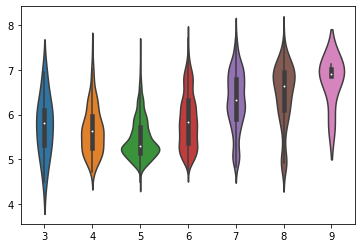

In [ ]:
sns.violinplot(x=data_pd['quality'].to_numpy() , y=pred1_detached )

Multilinear model

In [ ]:
def multiLinearModel(params, inputs):
  y_predict = params[0]*inputs[:,0] + params[1]*inputs[:,1] + params[2]*inputs[:,2] + params[3]
  return y_predict

In [ ]:
params2 = gradDec(multiLinearModel,4,x,y,0.00001,6000)
pred2 = multiLinearModel(params2, x)
pred2_detached = pred2.detach().numpy()

epoch: 0 loss= 8.113890647888184
epoch: 200 loss= 4.220888137817383
epoch: 400 loss= 3.5675220489501953
epoch: 600 loss= 3.0336410999298096
epoch: 800 loss= 2.5973899364471436
epoch: 1000 loss= 2.240912675857544
epoch: 1200 loss= 1.9496222734451294
epoch: 1400 loss= 1.711597204208374
epoch: 1600 loss= 1.51710045337677
epoch: 1800 loss= 1.3581676483154297
epoch: 2000 loss= 1.2282954454421997
epoch: 2200 loss= 1.122169852256775
epoch: 2400 loss= 1.0354489088058472
epoch: 2600 loss= 0.9645813703536987
epoch: 2800 loss= 0.9066703915596008
epoch: 3000 loss= 0.8593457937240601
epoch: 3200 loss= 0.8206723928451538
epoch: 3400 loss= 0.7890671491622925
epoch: 3600 loss= 0.7632378935813904
epoch: 3800 loss= 0.7421284914016724
epoch: 4000 loss= 0.7248751521110535
epoch: 4200 loss= 0.7107730507850647
epoch: 4400 loss= 0.6992459893226624
epoch: 4600 loss= 0.6898234486579895
epoch: 4800 loss= 0.682119607925415
epoch: 5000 loss= 0.6758207678794861
epoch: 5200 loss= 0.6706701517105103
epoch: 5400 loss

<Axes: >

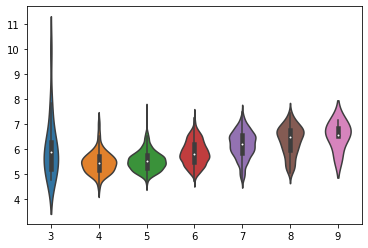

In [ ]:
sns.violinplot(x=data_pd['quality'].to_numpy(), y=pred2_detached ) #multilinear

Nonlinear model

In [ ]:
def nonlinearModel(params, inputs):
  y_predict = params[0]*inputs[:,0] + params[1]*inputs[:,1] + params[2]*inputs[:,2] + params[3]*inputs[:,0]*inputs[:,1] + params[4]
  return y_predict

In [ ]:
params3 = gradDec(nonlinearModel,5,x,y,0.00001,6000)
pred3 = nonlinearModel(params3, x)
pred3_detached = pred3.detach().numpy()

epoch: 0 loss= 38.16273498535156
epoch: 200 loss= 4.694300651550293
epoch: 400 loss= 3.91562557220459
epoch: 600 loss= 3.2869210243225098
epoch: 800 loss= 2.7793023586273193
epoch: 1000 loss= 2.369448184967041
epoch: 1200 loss= 2.038527488708496
epoch: 1400 loss= 1.77133309841156
epoch: 1600 loss= 1.5555992126464844
epoch: 1800 loss= 1.3814115524291992
epoch: 2000 loss= 1.2407671213150024
epoch: 2200 loss= 1.127205491065979
epoch: 2400 loss= 1.0355106592178345
epoch: 2600 loss= 0.9614697694778442
epoch: 2800 loss= 0.9016836285591125
epoch: 3000 loss= 0.8534078598022461
epoch: 3200 loss= 0.8144243359565735
epoch: 3400 loss= 0.782943069934845
epoch: 3600 loss= 0.7575199604034424
epoch: 3800 loss= 0.7369875311851501
epoch: 4000 loss= 0.720404326915741
epoch: 4200 loss= 0.707009494304657
epoch: 4400 loss= 0.696188747882843
epoch: 4600 loss= 0.6874465942382812
epoch: 4800 loss= 0.680382251739502
epoch: 5000 loss= 0.6746733784675598
epoch: 5200 loss= 0.67005854845047
epoch: 5400 loss= 0.6663

<Axes: >

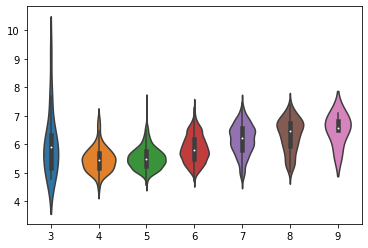

In [ ]:
sns.violinplot(x=data_pd['quality'].to_numpy(), y=pred3_detached)

Problem 3

In [ ]:
def threshold_accuracy(y_true, y_pred, threshold):
    correct = 0
    for i in range(len(y_true)):
        if abs(y_true[i] - y_pred[i]) <= threshold:
            correct += 1
    return correct / len(y_true)

In [ ]:
acc= []
for t in [0.25, 0.5, 1]:
    acc.append(threshold_accuracy(y, pred1, t))
print('Thresholded accuracy for Linear Model: ', acc)


Thresholded accuracy for Linear Model:  [0.2829726418946509, 0.48223764801959984, 0.8029808084932626]


In [ ]:
acc = []
for t in [0.25, 0.5, 1]:
    acc.append(threshold_accuracy(y, pred2, t))
print('Thresholded accuracy for Multi Linear Model: ', acc)


Thresholded accuracy for Multi Linear Model:  [0.245406288280931, 0.4897917517354022, 0.8246222948142099]


In [ ]:
acc = []
for t in [0.25, 0.5, 1]:
    acc.append(threshold_accuracy(y, pred3, t))
print('Thresholded accuracy for Non-Linear Model: ', acc)


Thresholded accuracy for Non-Linear Model:  [0.24663127807268273, 0.48346263781135157, 0.8248264597795019]


Problem 4

In [ ]:
k = 10

acc_lin = [0,0,0]
acc_mult = [0,0,0]
acc_non = [0,0,0]

for i in range(k):
  shuffled = data_pd.sample(frac = 1)
  test = shuffled[:980]
  train = shuffled[980:]

  features = ["pH", "free sulfur dioxide", "alcohol"]

#training data
  x_train_lin = torch.Tensor(train["alcohol"].values)
  x_train = torch.Tensor(train[features].values)
  y_train = torch.Tensor(train["quality"].values)

  x_mean = x_train.mean(dim=0)
  x_norm = (x_train-x_mean)/x_mean

  y_mean = y_train.mean(dim=0)
  y_norm = (y_train-y_mean)/y_mean

#testing data
  x_test_lin = torch.Tensor(test["alcohol"].values)
  x_test = torch.Tensor(test[features].values)
  y_test = torch.Tensor(test["quality"].values)

  x_test_mean = x_test.mean(dim=0)
  x_test_norm = (x_test - x_test_mean)/x_test_mean

#linear model

  params_lin = gradDec(linearModel,2,x_train_lin,y_train,0.001)
  pred1cv = linearModel(params_lin, x_test_lin)

  for idx, t in enumerate([0.25, 0.5, 1]):
    print(idx)
    acc_lin[idx] += threshold_accuracy(y_test, pred1cv, t)

#multi-linear model

  params_multi = gradDec(multiLinearModel,4,x_norm,y_norm,0.001)
  pred2cv = multiLinearModel(params_multi, x_test_norm)
  unnormalized_y_2 = pred2cv * y_mean + y_mean

  for idx, t in enumerate([0.25, 0.5, 1]):
    acc_mult[idx] += threshold_accuracy(y_test, unnormalized_y_2, t)

#non-linear model

  params_nonlin = gradDec(nonlinearModel,5,x_norm,y_norm,0.001)
  pred3cv = nonlinearModel(params_nonlin, x_test_norm)
  unnormalized_y_3 = pred3cv * y_mean + y_mean

  for idx, t in enumerate([0.25, 0.5, 1]):
    acc_non[idx] += threshold_accuracy(y_test, unnormalized_y_3, t)

for idx, elem in enumerate(acc_lin):
  acc_lin[idx] /= 10;

for idx, elem in enumerate(acc_mult):
  acc_mult[idx] /= 10;

for idx, elem in enumerate(acc_non):
  acc_non[idx] /= 10;



epoch: 0 loss= 26.72757339477539
epoch: 200 loss= 0.7241433262825012
epoch: 400 loss= 0.7232577800750732
epoch: 600 loss= 0.7223815321922302
epoch: 800 loss= 0.7215147614479065
epoch: 1000 loss= 0.7206573486328125
epoch: 1200 loss= 0.7198090553283691
epoch: 1400 loss= 0.7189697027206421
epoch: 1600 loss= 0.7181395292282104
epoch: 1800 loss= 0.7173181772232056
0
1
2
epoch: 0 loss= 0.030687104910612106
epoch: 200 loss= 0.026051467284560204
epoch: 400 loss= 0.023873591795563698
epoch: 600 loss= 0.022812552750110626
epoch: 800 loss= 0.022264111787080765
epoch: 1000 loss= 0.021955125033855438
epoch: 1200 loss= 0.02176143229007721
epoch: 1400 loss= 0.021626010537147522
epoch: 1600 loss= 0.021522192284464836
epoch: 1800 loss= 0.02143712155520916
epoch: 0 loss= 0.025762369856238365
epoch: 200 loss= 0.02350292168557644
epoch: 400 loss= 0.022460516542196274
epoch: 600 loss= 0.021966321393847466
epoch: 800 loss= 0.021719781681895256
epoch: 1000 loss= 0.021585719659924507
epoch: 1200 loss= 0.02150

In [ ]:
print("CV Threshold Accuracy for Linear model is: ", acc_lin)
print("CV Threshold Accuracy for MultiLinear model is: ",acc_mult)
print("CV Threshold Accuracy for Non-Linear model is: ",acc_non)


CV Threshold Accuracy for Linear model is:  [0.2722448979591837, 0.476938775510204, 0.8045918367346939]
CV Threshold Accuracy for MultiLinear model is:  [0.42326530612244895, 0.4493877551020408, 0.7537755102040815]
CV Threshold Accuracy for Non-Linear model is:  [0.44102040816326527, 0.4493877551020408, 0.7695918367346939]
